In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv("./anime.csv")

In [3]:
# sorted_ = df[["Name", "Score", "Genres","Episodes", "Ranked", "Popularity", "Members", "Favorites", "Watching", "Completed", "On-Hold", "Dropped", "Plan to Watch"]]
sorted_ = df.drop(["English name", "Japanese name", "Aired" ,"Premiered", "Type", 
                    "Producers", "Licensors", "Studios", "Source", "Duration", "Rating"], axis=1)
sorted_ = sorted_[(sorted_["Score"] != "Unknown")& (sorted_["Episodes"] != "Unknown")& (sorted_["Ranked"] != "Unknown")& (sorted_["Members"] != "0")]
sorted_["Score-10"] = sorted_["Score-10"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-9"] = sorted_["Score-9"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-8"] = sorted_["Score-8"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-7"] = sorted_["Score-7"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-6"] = sorted_["Score-6"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-5"] = sorted_["Score-5"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-4"] = sorted_["Score-4"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-3"] = sorted_["Score-3"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-2"] = sorted_["Score-2"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-1"] = sorted_["Score-1"].apply(lambda x: 0.0 if x == "Unknown" else float(x))

In [4]:
sorted_["all_score"] = sorted_["Score-10"] + sorted_["Score-9"] + sorted_["Score-8"] + sorted_["Score-7"]+ \
                    sorted_["Score-6"] + sorted_["Score-5"] + sorted_["Score-4"] + sorted_["Score-3"] + \
                    sorted_["Score-2"] + sorted_["Score-1"]
sorted_["positive"] = (sorted_["Score-10"]+ sorted_["Score-9"]) / sorted_["all_score"]
sorted_["negative"] = (sorted_["Score-1"]+ sorted_["Score-2"]+ sorted_["Score-3"]+ sorted_["Score-4"]+ sorted_["Score-5"]+ sorted_["Score-6"]) / sorted_["all_score"]
sorted_["NPS"] = sorted_["positive"] - sorted_["negative"]
sorted_.drop(["Score-10", "Score-9", "Score-8", "Score-7", "Score-6", "Score-5", "Score-4", "Score-3", "Score-2", "Score-1", "positive", "negative", "all_score"], 
           axis=1, inplace=True)

In [5]:
sorted_

,MAL_ID,Name,Score,Genres,Episodes,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,NPS
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26,28.0,39,1251960,61971,105808,718161,71513,26678,329800,0.584134
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",1,159.0,518,273145,1174,4143,208333,1935,770,57964,0.438269
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26,266.0,201,558913,12944,29113,343492,25465,13925,146918,0.353624
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",26,2481.0,1467,94683,587,4300,46165,5121,5378,33719,-0.086254
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",52,3710.0,4369,13224,18,642,7314,766,1108,3394,-0.217120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,47398,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,4,5461.0,3814,18161,72,617,6978,118,62,10386,-0.349436
17505,47402,Heikousen,7.52,"Music, Romance",1,1517.0,10869,832,27,17,549,8,1,257,0.202864
17512,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",1,4382.0,11973,540,8,51,168,18,2,301,-0.068376
17513,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",1,10760.0,4398,13070,90,1183,8196,119,202,3370,-0.749838


In [55]:
norm_df = pd.DataFrame(data=sorted_[["Score", "NPS", "Popularity"]])
norm_df["Favorites"] = sorted_["Favorites"]/sorted_["Members"]
norm_df["Watching"] = sorted_["Watching"]/sorted_["Members"]
norm_df["Completed"] = sorted_["Completed"]/sorted_["Members"]
norm_df["On-Hold"] = sorted_["On-Hold"]/sorted_["Members"]
norm_df["Dropped"] = sorted_["Dropped"]/sorted_["Members"]
norm_df["Plan to Watch"] = sorted_["Plan to Watch"]/sorted_["Members"]


# norm_df.fillna(0, inplace=True)
norm_df.dropna(inplace=True)
norm_df.isna().sum()

scaler = preprocessing.StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(norm_df), columns=norm_df.columns)

In [7]:
# norm_df[(norm_df["Dropped"].isnull())]
norm_df

,Score,NPS,Popularity,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,0.944142,0.894263,0.002472,0.373494,0.109443,0.589137,0.251559,0.060763,0.259244
1,0.891008,0.808701,0.033630,0.032431,0.019642,0.783339,0.031198,0.008039,0.205104
2,0.870572,0.759049,0.013010,0.174747,0.067453,0.631186,0.200652,0.071044,0.258649
3,0.738420,0.501025,0.095362,0.046779,0.058810,0.500756,0.238192,0.161967,0.357233
4,0.698910,0.424262,0.284135,0.010271,0.062868,0.568038,0.255100,0.238921,0.252085
...,...,...,...,...,...,...,...,...,...
10990,0.645777,0.346647,0.248032,0.029914,0.043995,0.394617,0.028615,0.009735,0.585306
10991,0.772480,0.670616,0.706954,0.244865,0.026460,0.677695,0.042346,0.003427,0.307306
10992,0.678474,0.511512,0.778768,0.111785,0.122302,0.319522,0.146799,0.010561,0.570002
10993,0.403270,0.111779,0.286021,0.051958,0.117211,0.644038,0.040097,0.044071,0.253341


Score


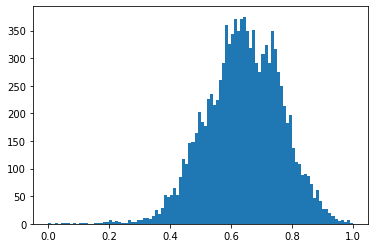

NPS


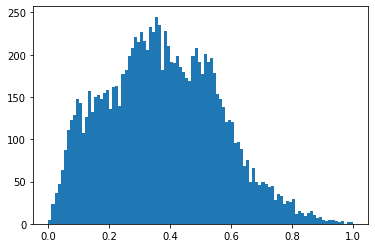

Popularity


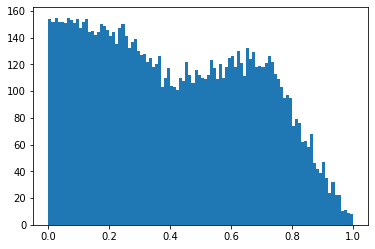

Favorites


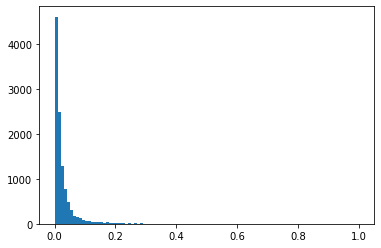

Watching


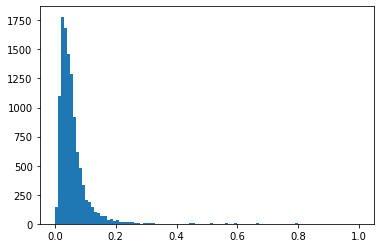

Completed


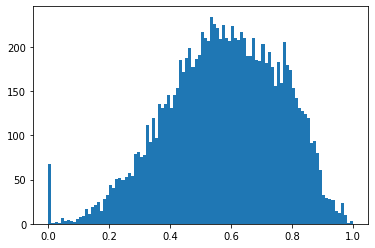

On-Hold


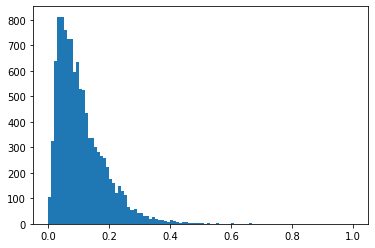

Dropped


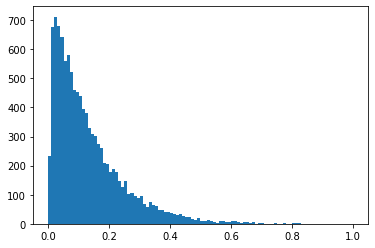

Plan to Watch


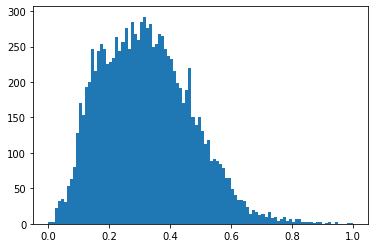

In [8]:
for column in norm_df.columns.values:
    print(column)
    plt.hist(norm_df[column], bins=100)
    plt.show()

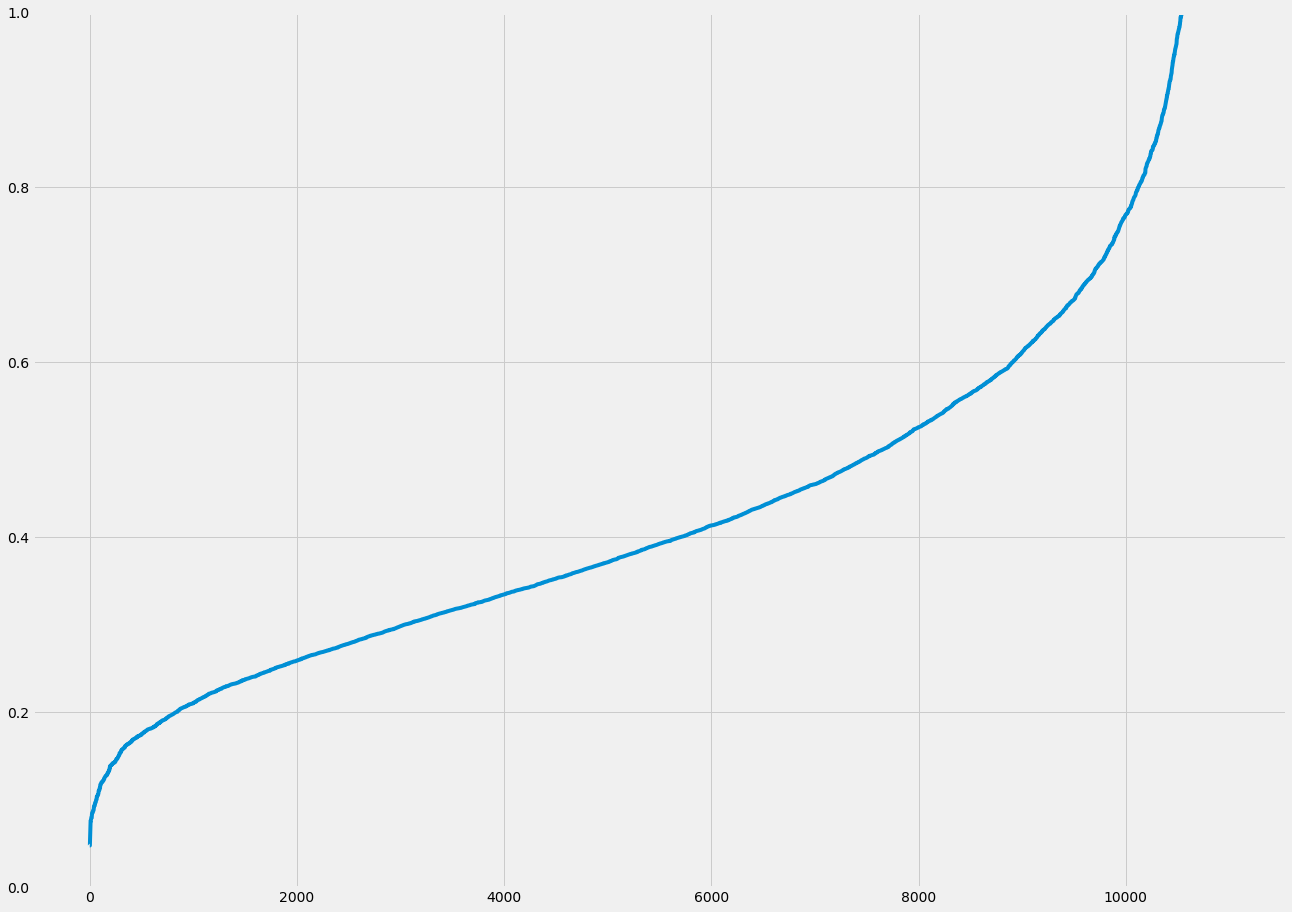

In [68]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(norm_df)
distances, indices = neighbors_fit.kneighbors(norm_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,15))
plt.ylim(0, 1)
plt.plot(distances)


40
5 (-1 6947)
4 (-1 6878)
6 (-1 6676)
5 (-1 6560)
4 (-1 6427)
4 (-1 6275)
4 (-1 6152)
3 (-1 6066)
3 (-1 5930)
3 (-1 5842)
3 (-1 5758)
2 (-1 5607)
2 (0 5500)
2 (0 5606)
2 (0 5683)
2 (0 5765)
2 (0 5855)
2 (0 5928)
2 (0 5992)
2 (0 6067)
2 (0 6159)
2 (0 6233)


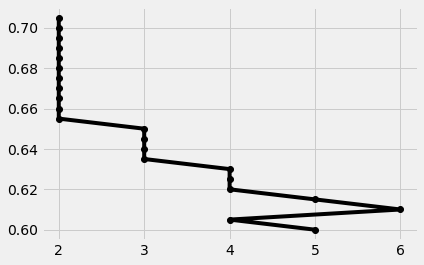

45
3 (-1 7310)
3 (-1 7196)
3 (-1 7088)
3 (-1 7001)
3 (-1 6905)
4 (-1 6758)
5 (-1 6550)
5 (-1 6424)
5 (-1 6296)
4 (-1 6168)
3 (-1 6021)
3 (-1 5906)
3 (-1 5787)
3 (-1 5708)
4 (-1 5600)
2 (-1 5509)
2 (0 5590)
2 (0 5693)
2 (0 5795)
2 (0 5878)
2 (0 5973)
2 (0 6054)


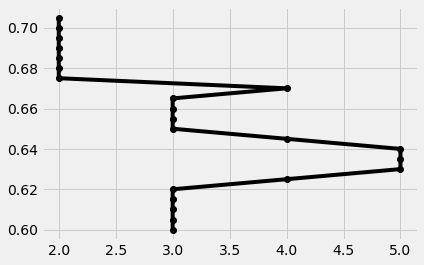

50
3 (-1 7555)
3 (-1 7472)
3 (-1 7340)
3 (-1 7240)
3 (-1 7134)
3 (-1 7053)
3 (-1 6929)
3 (-1 6808)
4 (-1 6659)
5 (-1 6528)
5 (-1 6438)
3 (-1 6359)
3 (-1 6130)
3 (-1 6029)
3 (-1 5886)
3 (-1 5740)
3 (-1 5660)
3 (-1 5575)
3 (-1 5509)
2 (0 5589)
2 (0 5731)
2 (0 5852)


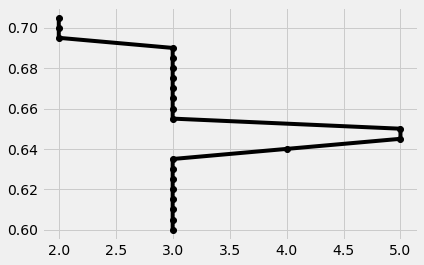

In [85]:
# Определяем модель
# norm_df = norm_df.drop(['Clusters'], axis=1)
samp_i = 40
x = np.array([])
y = np.array([])


while samp_i <= 50:
    print(samp_i)
    eps_i = 0.6
    while eps_i <= 0.71:
    #     print(eps_i)
        dbscan = DBSCAN(eps=eps_i,
        min_samples=samp_i,)
        dbscan.fit(norm_df)
    
        clustersL = dbscan.labels_.tolist()
        print(f"{len(set(clustersL))} ({max(clustersL,key=clustersL.count)} {Counter(clustersL).most_common(1)[0][1]})")
    #     print(len(set(clustersL)))
        x = np.append(x, len(set(clustersL)))
        y = np.append(y, eps_i)
        eps_i += 0.005
    #     print(Counter(clustersL).most_common(1)[0][1])
    #     print('-'*100)
    samp_i += 5
    plt.plot(x, y, '-ok');
    plt.show()
    x = np.array([])
    y = np.array([])
    
# Обучаем

# Уменьшаем размерность при помощи метода главных компонент
# pca = PCA(n_components=9).fit(norm_df)
# pca_3d = pca.transform(norm_df)

In [88]:
dbscan = DBSCAN(eps=0.635,
    min_samples=45,)
dbscan.fit(norm_df)
clustersL = dbscan.labels_.tolist()
print(set(clustersL))

{0, 1, 2, 3, -1}


In [73]:
dbscan = DBSCAN(eps=0.6,
    min_samples=20,)
dbscan.fit(norm_df)
clustersL = dbscan.labels_.tolist()
print(len(set(clustersL)))
print(max(clustersL,key=clustersL.count))
print(Counter(clustersL).most_common(1)[0][1])

4
0
5679


In [89]:
norm_df['Clusters'] = dbscan.labels_

In [90]:
# norm_df[(norm_df["Clusters"] != -1)&(norm_df["Clusters"] != 0)]

for i in range(4):
    print(i)
    print(norm_df[(norm_df["Clusters"] == i)].describe())

0
             Score          NPS   Popularity    Favorites     Watching  \
count  4427.000000  4427.000000  4427.000000  4427.000000  4427.000000   
mean     -0.143081    -0.182729     0.159206    -0.386362    -0.442876   
std       0.904717     0.915235     0.899651     0.202884     0.217100   
min      -2.826092    -2.021949    -1.519210    -0.596452    -0.874245   
25%      -0.805551    -0.923680    -0.590851    -0.543462    -0.606555   
50%      -0.072828    -0.178043     0.116995    -0.434627    -0.476216   
75%       0.571080     0.541310     0.854001    -0.285539    -0.310740   
max       1.992120     2.214038     2.254048     0.587529     0.553138   

         Completed      On-Hold      Dropped  Plan to Watch  Clusters  
count  4427.000000  4427.000000  4427.000000    4427.000000    4427.0  
mean      0.530851    -0.611005    -0.504052      -0.305072       0.0  
std       0.736663     0.381321     0.530098       0.841297       0.0  
min      -1.332857    -1.372172    -1.09426

In [14]:
norm_df['Clusters'].unique()

array([-1,  0,  1,  4,  2,  3])

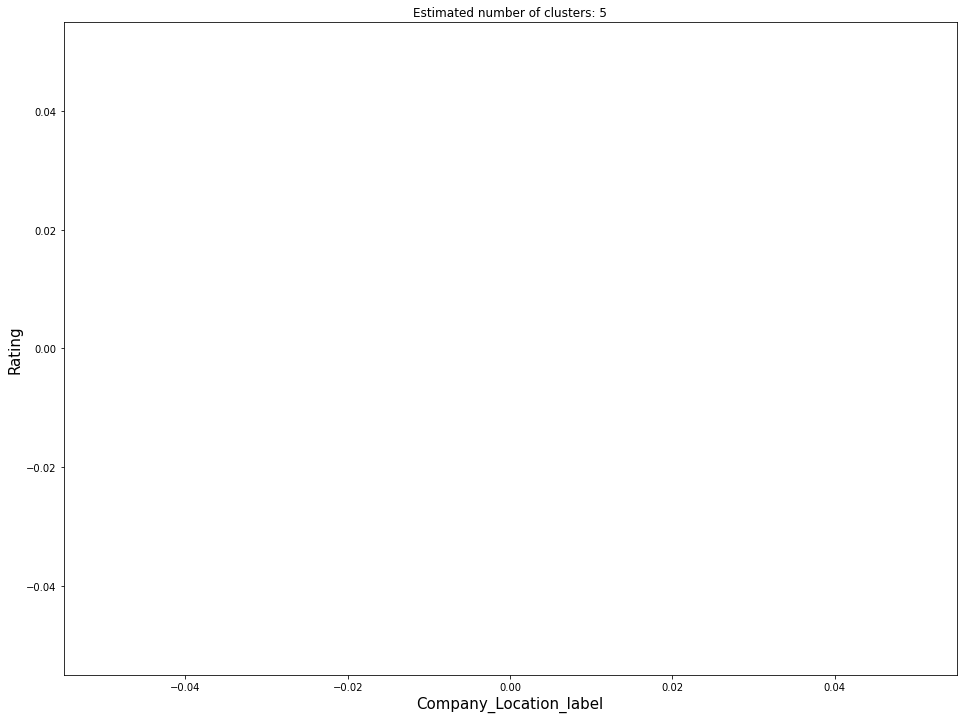

In [15]:
plt.figure(figsize=(16,12))
X = norm_df

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
unique_labels = set(dbscan.labels_)
n_clusters_ = len(set(unique_labels)) - (1 if -1 in unique_labels else 0)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (unique_labels == k)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 4], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
    ax = plt.gca()
    ax.set_xlabel('Company_Location_label', fontsize=15)
    ax.set_ylabel('Rating', fontsize=15)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [16]:
new_df = df.Genres.str.split(', ', expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Name', 'Frequency'] 
genresNames = new_df['Name']
animeNames = df['Name']
# pd.set_option('display.max_rows', 15)

new_df.sort_values(by=['Frequency'], ascending=False)
genres = pd.DataFrame(new_df['Name'])
genres.set_index('Name', inplace=True)
genres= genres.T
genres[['Name', 'Genres']] = df[['Name', 'Genres']]
genres.set_index('Name', inplace=True)
# print(genres.columns) 

In [17]:
genres

Name,Comedy,Action,Fantasy,Adventure,Kids,Drama,Sci-Fi,Music,Shounen,Slice of Life,...,Vampire,Cars,Thriller,Shounen Ai,Josei,Shoujo Ai,Unknown,Yaoi,Yuri,Genres
Name,,,,,,,,,,,,,,,,,,,,,
Cowboy Bebop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
Cowboy Bebop: Tengoku no Tobira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Action, Drama, Mystery, Sci-Fi, Space"
Trigun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
Witch Hunter Robin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Action, Mystery, Police, Supernatural, Drama, ..."
Bouken Ou Beet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Daomu Biji Zhi Qinling Shen Shu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Adventure, Mystery, Supernatural"
Mieruko-chan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Comedy, Horror, Supernatural"
Higurashi no Naku Koro ni Sotsu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Mystery, Dementia, Horror, Psychological, Supe..."


In [18]:
for genre in genresNames:
    for anime in animeNames:
        if genre in genres['Genres'][anime]:
            genres[genre][anime] = 1

/tmp/ipykernel_29420/1123277970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres[genre][anime] = 1


In [28]:
genres.fillna(0, inplace = True)

<AxesSubplot:xlabel='Comedy', ylabel='Action'>

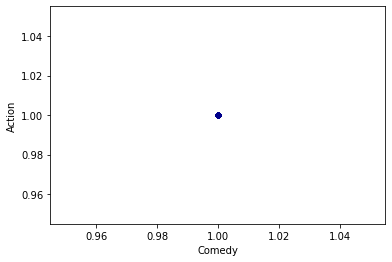

In [24]:
# plt.plot(genres['Comedy'], genres['Action'])
# plt.ylabel('some numbers')
# plt.show()
genres.plot.scatter(x='Comedy',
                    y='Action',
                    c='DarkBlue')

In [37]:
genres.drop(columns = ['Genres'], inplace = True)

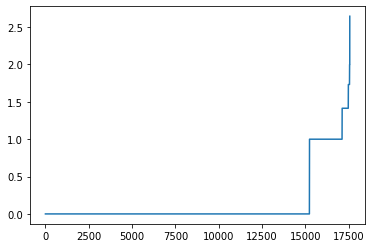

In [38]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(genres)
distances, indices = neighbors_fit.kneighbors(genres)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [53]:
dbscan = DBSCAN(eps=1.00,
    min_samples=20,)
dbscan.fit(genres)
clustersL = dbscan.labels_.tolist()
print(len(set(clustersL)))
print(max(clustersL,key=clustersL.count))
print(Counter(clustersL).most_common(1)[0][1])

2
0
16240
